### DATA DESCRIPTION: 

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 
 
### ATTRIBUTE INFORMATION: 

1. age : Age (years) 
2. workclass : Workclass 8 different categories: (Private, Self-emp-not-inc,   Self-emp-inc, Federal-gov, Localgov, State-gov, Without-pay, Never-worked) 

3. fnlwgt:  Final Weight* 

4. Education: (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool) 

5. education-num : Years of education 
6. marital-status : Marital Status: (Married-civ-spouse,   Divorced, Never-married, Separated, Widowed, Marriedspouse-absent,   Married-AF-spouse) 
7. occupation : Occupation: (Tech-support, Craft-repair,   Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,   Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Privhouse-serv,   Protective-serv, Armed-Forces) 

8. relationship: Relationship:(Wife, Own-child, Husband,   Not-in-family, Other-relative, Unmarried) 

9. race: Race: (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black) 

10. sex: Sex: (Male, Female) 

11. capital-gain: Amount of capital gained 

12. capital-loss: Amount of capital lost 

13. hours-perweek: Number of hours worked per week 

14. native-country : Native country: (United-States, Cambodia, England, Puerto-Rico, Canada, Germany,   OutlyingUS(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,   Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland,   France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary,   Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador,   Trinadad&Tobago, Peru, Hong, Holand-Netherlands) 

15. income : Either the income is greater than 

$ 50,000 or lesser than and equal to $ 50,000: (>50K, <=50K) 

In [4]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pd.set_option('display.max_columns',None)
plt.rcParams['figure.figsize'] = (15,8)

In [215]:
df=pd.read_csv("data_set.csv")

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,49,Private,323773,11th,7,Married-civ-spouse,Priv-house-serv,Other-relative,White,Female,0,0,40,United-States,<=50K
1,48,Private,175070,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,2258,40,United-States,>50K
2,48,Self-emp-not-inc,51620,Bachelors,13,Separated,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
3,90,Self-emp-not-inc,155981,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,10566,0,50,United-States,<=50K
4,44,Self-emp-inc,168845,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,60,United-States,<=50K


In [9]:
df.shape

(2000, 15)

In [15]:
numerical_cols = df.select_dtypes('int').columns
categorical_cols = df.select_dtypes('object').columns

In [22]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,38.676500,187979.847500,10.065500,1261.799000,83.034500,40.316000
std,13.713055,104959.530657,2.578475,8398.998049,388.689399,12.239732
min,17.000000,19214.000000,1.000000,0.000000,0.000000,1.000000
25%,27.000000,114627.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,174642.500000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,235881.750000,12.000000,0.000000,0.000000,45.000000
max,90.000000,750972.000000,16.000000,99999.000000,2603.000000,99.000000


In [24]:
# Checking the percent values in each category for categorical attributes.
for col in categorical_cols:
    print(col)
    print()
    print('categories ------- % observations in category')
    print(df[col].value_counts(normalize = True)*100)
    print()
    print('=='*50)
    
    

workclass

categories ------- % observations in category
Private             69.45
Local-gov            7.50
Self-emp-not-inc     7.05
?                    5.90
State-gov            3.95
Self-emp-inc         3.60
Federal-gov          2.50
Never-worked         0.05
Name: workclass, dtype: float64

education

categories ------- % observations in category
HS-grad         31.15
Some-college    23.20
Bachelors       17.60
Masters          4.80
Assoc-voc        4.30
11th             3.75
Assoc-acdm       3.65
10th             3.05
7th-8th          2.10
Prof-school      1.30
9th              1.30
5th-6th          1.15
Doctorate        1.10
12th             0.70
1st-4th          0.65
Preschool        0.20
Name: education, dtype: float64

marital.status

categories ------- % observations in category
Married-civ-spouse       45.30
Never-married            33.35
Divorced                 13.40
Separated                 3.30
Widowed                   3.10
Married-spouse-absent     1.45
Married-AF-s

In [29]:
# Are 'education' and 'education.num' features are same or not
df.groupby(['education'])['education.num'].value_counts()

education     education.num
10th          6                 61
11th          7                 75
12th          8                 14
1st-4th       2                 13
5th-6th       3                 23
7th-8th       4                 42
9th           5                 26
Assoc-acdm    12                73
Assoc-voc     11                86
Bachelors     13               352
Doctorate     16                22
HS-grad       9                623
Masters       14                96
Preschool     1                  4
Prof-school   15                26
Some-college  10               464
Name: education.num, dtype: int64

In [31]:
df.groupby(['occupation'])['workclass'].value_counts()

occupation         workclass       
?                  ?                   118
                   Never-worked          1
Adm-clerical       Private             183
                   Local-gov            22
                   Federal-gov          20
                   State-gov             9
                   Self-emp-not-inc      5
                   Self-emp-inc          1
Craft-repair       Private             176
                   Self-emp-not-inc     38
                   Self-emp-inc         10
                   State-gov             5
                   Local-gov             3
                   Federal-gov           2
Exec-managerial    Private             166
                   Self-emp-inc         18
                   Local-gov            16
                   Self-emp-not-inc     16
                   State-gov            16
                   Federal-gov          11
Farming-fishing    Self-emp-not-inc     28
                   Private              21
                  

In [32]:
df.groupby(['relationship'])['marital.status'].value_counts()

relationship    marital.status       
Husband         Married-civ-spouse       803
                Married-AF-spouse          1
Not-in-family   Never-married            281
                Divorced                 146
                Widowed                   38
                Separated                 34
                Married-spouse-absent     15
                Married-civ-spouse         2
Other-relative  Never-married             36
                Married-civ-spouse        11
                Separated                  4
                Widowed                    3
                Divorced                   2
                Married-spouse-absent      2
Own-child       Never-married            290
                Divorced                  20
                Separated                  5
                Married-civ-spouse         3
                Married-spouse-absent      3
Unmarried       Divorced                 100
                Never-married             60
                S

In [89]:
df.groupby(['relationship'])['sex'].value_counts()

relationship    sex   
Husband         Male      804
Not-in-family   Male      267
                Female    249
Other-relative  Male       30
                Female     28
Own-child       Male      175
                Female    146
Unmarried       Female    167
                Male       46
Wife            Female     87
                Male        1
Name: sex, dtype: int64

##### Summary for categorical variables 
- features like navie.country, occupation, work-class has '?' as their values
- there are some features which are redundant
     1. education & educatuin.num  tells same thing. So we *drop* education becoz education.num is a ordinal feature.
- 90% of the data's native_country is united_states, so other countries can be replaced as *other*
- should check work-class and occupation are independent or dependent using chi_square
- can do some feature engineering in relationship and marital_status
- the data is biased to '<=50k'
     

In [216]:
df_copy = df.copy(deep = True)

In [46]:
# checking the data containing '?'
df_copy[df_copy['occupation'] == '?']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
24,62,?,68461,Doctorate,16,Married-civ-spouse,?,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,>50K
28,29,?,297054,HS-grad,9,Divorced,?,Not-in-family,White,Male,0,0,40,United-States,<=50K
54,24,?,174182,11th,7,Married-civ-spouse,?,Wife,Other,Female,0,0,24,United-States,<=50K
78,67,?,150516,HS-grad,9,Widowed,?,Unmarried,White,Male,0,0,3,United-States,<=50K
79,30,?,197827,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
87,19,?,169324,Some-college,10,Never-married,?,Own-child,White,Male,0,0,10,United-States,<=50K
155,32,?,227160,Some-college,10,Divorced,?,Not-in-family,White,Male,0,0,40,United-States,<=50K
165,69,?,164102,HS-grad,9,Divorced,?,Not-in-family,White,Female,0,0,40,United-States,>50K
181,77,?,158847,Assoc-voc,11,Married-spouse-absent,?,Not-in-family,White,Female,0,0,25,United-States,<=50K
199,45,?,189564,Masters,14,Married-civ-spouse,?,Wife,White,Female,0,0,1,United-States,<=50K


In [35]:
# Replacing ? as np.nan(null) and checking attribute wise null values.
df_copy.replace('?',np.nan).isnull().sum()

age                 0
workclass         118
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        119
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country     35
income              0
dtype: int64

### Feature-Engineering

In [232]:
#  90% of the data's native_country is united_states, so other countries can be replaced as other

other_than_us = df['native.country'].unique()[1:]
df['native.country'].replace(to_replace =other_than_us, value = 'other' ,inplace = True) 

df['native.country'].replace({'United-States':1, 'other' :0},inplace = True) #Encoding

In [233]:
# education & educatuin.num  tells same thing. So WE drop education becoz education.num is a ordinal feature.
df.drop(columns='education',inplace = True)

In [234]:
# changing some marital.status to married_but_single and encoding
df['marital.status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent','Married-AF-spouse'],value = 'married_but_single',inplace = True)

df['marital.status'].replace({'Never-married':0,'married_but_single':1,'Married-civ-spouse':2},inplace = True)

In [235]:
# Does martial.status and relationship features influence eachother..?

from scipy.stats import chi2_contingency

observed = pd.crosstab(index = df_copy['marital.status'], columns=df_copy['relationship'])
stat,P_value,dof, expected = chi2_contingency(observed)

if P_value <= 0.05:
    print('Reject H0 (Columns are Dependent)')
else:
    print('Fail to reject H0 (columns are Independent)')

Reject H0 (Columns are Dependent)


In [236]:
# as columns : relationship status and marital.status are dependent 
# dropping column relationship status.

df.drop(columns = 'relationship',inplace = True)

In [237]:
df['sex'].replace({'Male' : 0,'Female' : 1},inplace = True)

In [238]:
df['income'].replace({'<=50K' : 0,'>50K' : 1},inplace = True)

In [239]:
df['race'].value_counts()

White                 1713
Black                  194
Asian-Pac-Islander      54
Amer-Indian-Eskimo      22
Other                   17
Name: race, dtype: int64

In [240]:
df.groupby(['race'])['income'].value_counts(normalize = True)

race                income
Amer-Indian-Eskimo  0         0.863636
                    1         0.136364
Asian-Pac-Islander  0         0.777778
                    1         0.222222
Black               0         0.871134
                    1         0.128866
Other               0         0.882353
                    1         0.117647
White               0         0.751313
                    1         0.248687
Name: income, dtype: float64

- as the data is dominated by race = White.
- other races are mostly belong to income group '<=50K'.
- so expect race : Asian-Pac _Islander treating other races  as other 

In [241]:
df['race'].replace(to_replace =['Amer-Indian-Eskimo','Black'], value = 'Other' ,inplace = True)

In [242]:
df['workclass'].value_counts()

Private             1389
Local-gov            150
Self-emp-not-inc     141
?                    118
State-gov             79
Self-emp-inc          72
Federal-gov           50
Never-worked           1
Name: workclass, dtype: int64

In [243]:
df.groupby(['workclass'])['income'].value_counts(normalize = True)

workclass         income
?                 0         0.898305
                  1         0.101695
Federal-gov       0         0.600000
                  1         0.400000
Local-gov         0         0.706667
                  1         0.293333
Never-worked      0         1.000000
Private           0         0.786177
                  1         0.213823
Self-emp-inc      1         0.583333
                  0         0.416667
Self-emp-not-inc  0         0.773050
                  1         0.226950
State-gov         0         0.734177
                  1         0.265823
Name: income, dtype: float64

In [244]:
df['workclass'].replace({'Local-gov':'gov','State-gov':'gov','Federal-gov':'gov',
                         'Self-emp-not-inc':'self','Self-emp-inc':'self','Never-worked' : 'self',
                        '?' : np.nan},inplace = True)

In [245]:
df.groupby(['workclass'])['income'].value_counts(normalize = True)

workclass  income
Private    0         0.786177
           1         0.213823
gov        0         0.695341
           1         0.304659
self       0         0.654206
           1         0.345794
Name: income, dtype: float64

In [246]:
df['occupation'].replace('?',np.nan,inplace = True)

In [247]:
# normalizing the values in numerical columns
for col in ['fnlwgt','age','capital.gain','capital.loss','hours.per.week','education.num']:
    
    min_ = df[col].min()
    max_ = df[col].max()
    df[col] = (df[col] - min_)/(max_ - min_)  

In [ ]:
df.dropna(inplace = True)

### Statistical Test 

In [219]:
# Anova test for numerical cols : For each column , does it has significant variation b/w classes

num_cols = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']

income_less_than_fifty = df_copy[df_copy['income'] == '<=50K']
income_greater_than_fifty = df_copy[df_copy['income'] == '>50K']

less_num = income_less_than_fifty[num_cols]
greater_num = income_greater_than_fifty[num_cols]

from scipy.stats import f_oneway
F,p = f_oneway(less_num,greater_num) 

In [229]:
selected_num = []
for col,P_value in zip(num_cols,p):
    print(col)
    print()
    print(f'P_value for column {col} : {P_value}')
    if P_value < 0.05:
        print(f'Reject H0, (means are different and {col} is a significant feature')
        selected_num.append(col)
    else:
        print(f'Fail to Reject H0, (means are not different and {col} is a NOT a significant feature')
        
    print()
    print('--'*50)

age

P_value for column age : 2.4494605778467692e-25
Reject H0, (means are different and age is a significant feature

----------------------------------------------------------------------------------------------------
fnlwgt

P_value for column fnlwgt : 0.794100996639812
Fail to Reject H0, (means are not different and fnlwgt is a NOT a significant feature

----------------------------------------------------------------------------------------------------
education.num

P_value for column education.num : 7.793975637806469e-50
Reject H0, (means are different and education.num is a significant feature

----------------------------------------------------------------------------------------------------
capital.gain

P_value for column capital.gain : 1.353093030172085e-25
Reject H0, (means are different and capital.gain is a significant feature

----------------------------------------------------------------------------------------------------
capital.loss

P_value for column capital.lo

In [231]:
# Performing Chi-Square test of Independence for categorical columns.

cat_cols = ['workclass','marital.status','occupation','race','sex','native.country']
selected_cat = []

for col in cat_cols:
    print(col)
    
    observed = pd.crosstab(index = df_copy['income'], columns=df_copy[col])
    stat,P_value,dof, expected = chi2_contingency(observed)

    if P_value <= 0.05:
        print(f'Reject H0 ({col} is Dependent with income(target))')
        selected_cat.append(col)
        
    else:
        print(f'Fail to reject H0 ({col} is  Independent with target)')
        
    print()
    print('--'*50)

workclass
Reject H0 (workclass is Dependent with income(target))

----------------------------------------------------------------------------------------------------
marital.status
Reject H0 (marital.status is Dependent with income(target))

----------------------------------------------------------------------------------------------------
occupation
Reject H0 (occupation is Dependent with income(target))

----------------------------------------------------------------------------------------------------
race
Reject H0 (race is Dependent with income(target))

----------------------------------------------------------------------------------------------------
sex
Reject H0 (sex is Dependent with income(target))

----------------------------------------------------------------------------------------------------
native.country
Fail to reject H0 (native.country is  Independent with target)

------------------------------------------------------------------------------------------------

In [250]:
df.drop(columns= ['fnlwgt','native.country'],inplace = True) # Removing Insignificant features

In [255]:
df['income'].value_counts()

0    1425
1     456
Name: income, dtype: int64

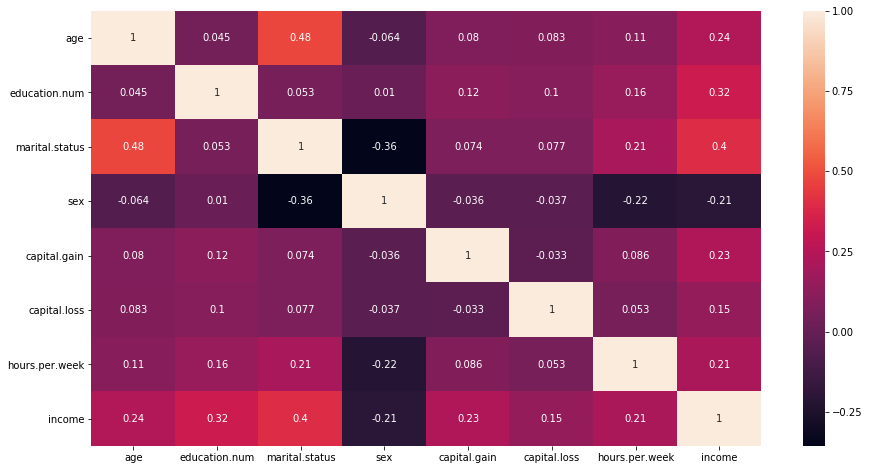

In [270]:
sns.heatmap(df.corr(),annot = True)

In [ ]:
# Box-Plots for numerical cols 
num_cols = ['age','education.num','capital.gain','capital.loss','hours.per.week']

for col in num_cols:
    print(col)
    sns.boxplot(data = df ,x = 'income',y = col)
    plt.show()
    print()
    

In [ ]:
cat_cols = ['workclass','marital.status','occupation','race','sex']

for col in cat_cols:
    print(col)
    sns.countplot(data = df ,hue = 'income',x = col)
    plt.show()
    print()

In [256]:
# Splitting data into dependent variable and independent variables
x = df.drop(columns='income') 
y = df['income']

In [258]:
x.head()

,age,workclass,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week
0,0.438356,Private,0.400000,2,Priv-house-serv,White,1,0.000000,0.000000,0.397959
1,0.424658,Private,0.533333,1,Exec-managerial,White,1,0.000000,0.867461,0.397959
2,0.424658,self,0.800000,1,Craft-repair,White,0,0.000000,0.000000,0.500000
3,1.000000,self,0.800000,2,Prof-specialty,White,0,0.105661,0.000000,0.500000
4,0.369863,self,0.533333,2,Sales,White,1,0.000000,0.000000,0.602041


In [260]:
# AS data is biased to class-0, upsampling the class-0 rows using SMOTE
from imblearn.over_sampling import SMOTENC 

sm = SMOTENC(categorical_features = [1,4,5],random_state = 0)
x_over,y_over =sm.fit_resample(x,y)

In [264]:
x_over_dummies = pd.get_dummies(x_over)

In [262]:
y_over.value_counts()

1    1425
0    1425
Name: income, dtype: int64

In [267]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_over_dummies,y_over)

In [281]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

In [289]:
def clf(mod):
    
    print(mod)
    model = mod(random_state = 0)
    model.fit(x_train,y_train)
    
    y_predict = model.predict(x_test)
    print(accuracy_score(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    
    
    print()
    print('--'*40)

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [290]:
# Checking the results for different Base Models

models = [LogisticRegression,DecisionTreeClassifier,ExtraTreeClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier]
for model in models:
    clf(model)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
0.7966339410939691
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       352
           1       0.78      0.83      0.81       361

    accuracy                           0.80       713
   macro avg       0.80      0.80      0.80       713
weighted avg       0.80      0.80      0.80       713


--------------------------------------------------------------------------------
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
0.8401122019635343
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       352
           1       0.86      0.82      0.84       361

    accuracy                           0.84       713
   macro avg       0.84      0.84      0.84       713
weighted avg       0.84      0.84      0.84       713


--------------------------------------------------------------------------------
<class 'sklearn.tree._classes

- Base RandomForest Classifier is giving best accuracy_score and best f1_score,so going further with random forest classifer

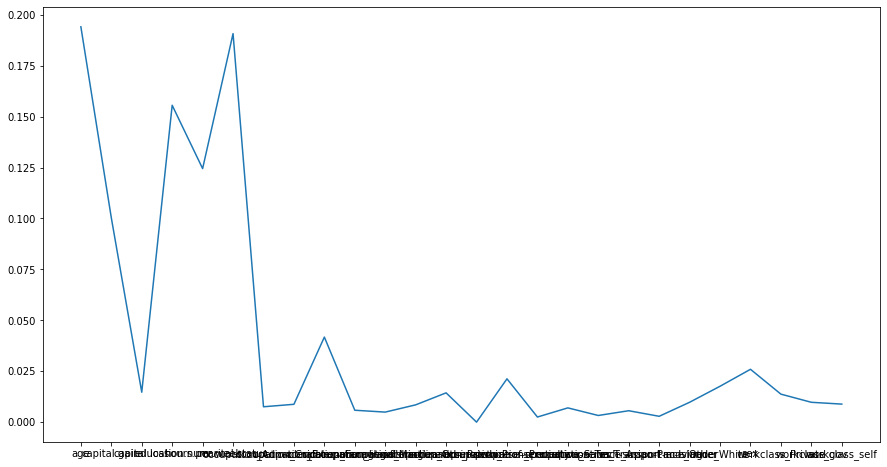

In [341]:
# Checking the feature Importance for GradientBoost Classifer
sns.lineplot(y= model.feature_importances_, x = x_over_dummies.columns)

In [ ]:
# df_import = pd.DataFrame(columns = range(26)) 
# models = [DecisionTreeClassifier,ExtraTreeClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier]
# labels = ['Decision_tree','Extratree','RandomForest','AdaBoost','GradientBoost']
# pylab.figure(figsize = (20,8))

# for i in range(len(models)):
#     df_import[i] = models[i]().fit(x_over_dummies,y_over).feature_importances_ 
#     pylab.plot(df_import.loc[i],'-v',markersize = 7,label = labels[i], markeredgewidth = 2)
    
# pylab.legend(loc=2)
# pylab.show()

In [ ]:
df_import = pd.DataFrame(columns = range(26)) 
models = [DecisionTreeClassifier,ExtraTreeClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier]
labels = ['Decision_tree','Extratree','RandomForest','AdaBoost','GradientBoost']
pylab.figure(figsize = (20,8))

for i in range(len(models)):
    df_import[i] = models[i]().fit(x_over_dummies,y_over).feature_importances_ 
    sns.lineplot(y= df_import.loc[i],x = x_over_dummies.columns'-v',markersize = 7,label = labels[i], markeredgewidth = 2)
    
pylab.legend(loc=2)
pylab.show()

### RandomForest Classifier

In [291]:
from sklearn.model_selection import cross_val_score,GridSearchCV

In [317]:
rf = RandomForestClassifier(random_state=0)

param = {'n_estimators' : [100,200,250],
        'max_depth':[3,5,10,15],
        'min_samples_split' : [2,5,10,15],
        'min_samples_leaf' : [2,5,10,15,20]}

grid = GridSearchCV(rf,
                    param,
                    cv = 5,
                    scoring='f1',
                    n_jobs = -1,
                    return_train_score=True)

grid.fit(x_over_dummies,y_over)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15],
                         'min_samples_leaf': [2, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 200, 250]},
             return_train_score=True, scoring='f1')

In [320]:
df_results = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score').head(1)

In [321]:
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
182,2.45517,0.331877,0.204027,0.055567,15,2,2,250,"{'max_depth': 15, 'min_samples_leaf': 2, 'min_...",0.774436,0.858621,0.893688,0.898026,0.889621,0.862878,0.046346,1,0.951682,0.94062,0.931565,0.926209,0.934019,0.936819,0.008757


In [311]:
print(f"training_f1_score = {df_results['mean_train_score'].values} ,\n training_std = {df_results['std_train_score'].values}")
      
print()
print(f"testing_f1_score = {df_results['mean_test_score'].values} ,\n testing_std = {df_results['std_test_score'].values}")

training_f1_score = [0.93681901] ,
 training_std = [0.00875658]

testing_f1_score = [0.86287838] ,
 testing_std = [0.04634637]


In [318]:
grid.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=250,
                       random_state=0)

In [322]:
rf2 = RandomForestClassifier(random_state=0)

param = {'n_estimators' : [300,275,250],
        'max_depth':[13,15,17,20],
        'min_samples_split' : [2,3,4],
        'min_samples_leaf' : [2,3,4,5]}

grid2 = GridSearchCV(rf,
                    param,
                    cv = 5,
                    scoring='accuracy',
                    n_jobs = -1,
                    return_train_score=True)

grid2.fit(x_over_dummies,y_over)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [13, 15, 17, 20],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 275, 250]},
             return_train_score=True, scoring='accuracy')

In [323]:
df_results2 = pd.DataFrame(grid2.cv_results_).sort_values('rank_test_score').head(1)

In [327]:
df_results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
113,2.261836,0.348875,0.177802,0.055518,20,2,3,250,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",0.794737,0.849123,0.9,0.891228,0.887719,0.864561,0.039031,1,0.965789,0.954825,0.948246,0.944298,0.948246,0.952281,0.007553


In [324]:
print(f"training_f1_score = {df_results2['mean_train_score'].values} ,\n training_std = {df_results2['std_train_score'].values}")
      
print()
print(f"testing_f1_score = {df_results2['mean_test_score'].values} ,\n testing_std = {df_results2['std_test_score'].values}")

training_f1_score = [0.9522807] ,
 training_std = [0.00755303]

testing_f1_score = [0.8645614] ,
 testing_std = [0.03903105]


In [332]:
# final_model

y_predict = grid2.predict(x_test)
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

print()


0.9424964936886395
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       352
           1       0.92      0.97      0.94       361

    accuracy                           0.94       713
   macro avg       0.94      0.94      0.94       713
weighted avg       0.94      0.94      0.94       713




- f1_scores with 95% test scores  and  86% for tuned model.
- The model is a **Good model**

1. Parameters such as max_depth,n_estimators,min_samples_split,min_samples_leaf affected the performance of the model